In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and pre-processing

In [2]:
gold_price_dataset = pd.read_csv("dataset/gld_price_data.csv")

In [3]:
gold_price_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_price_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_price_dataset.shape

(2290, 6)

In [8]:
gold_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
## checking the number of missing value
gold_price_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
## Getting the statistical measures of the data
gold_price_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation
1. Positive correlation
2. Negative correlation

In [14]:
correlation = gold_price_dataset.corr(numeric_only=True)

<Axes: >

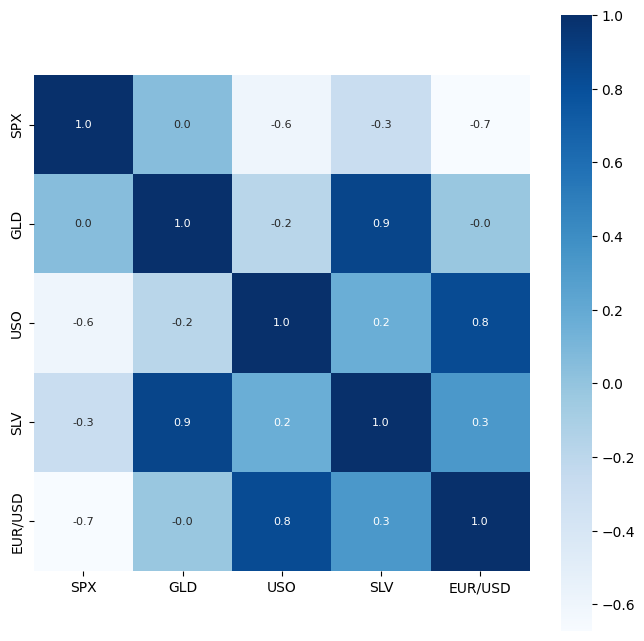

In [20]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [21]:
## coorelation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/by/qcn1g28d0670bbq7bzt0y1n40000gn/T/ipykernel_22634/1177205091.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_price_dataset.GLD, color="Green")
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated 

<Axes: xlabel='GLD', ylabel='Density'>

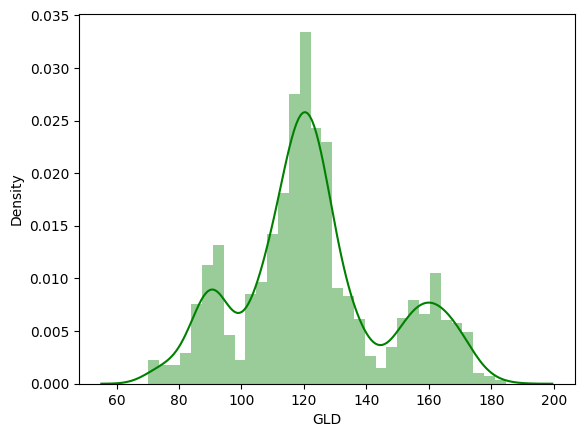

In [25]:
# checking the distribution of the GLD Price
sns.distplot(gold_price_dataset.GLD, color="Green")

## Splitting the features and target

In [33]:
X = gold_price_dataset.drop(columns=["Date", "GLD"], axis=1)
y = gold_price_dataset["GLD"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
X.shape, X_train.shape, X_test.shape, 

((2290, 4), (1832, 4), (458, 4))

## Model Training

In [58]:
model = RandomForestRegressor(n_estimators=100)

In [59]:
model.fit(X_train, y_train)

RandomForestRegressor()

## Model evaluation

In [60]:
y_train_pred = model.predict(X_train)
mse_score = metrics.r2_score(y_train, y_train_pred)
print(f"Error square: {mse_score}")

Error square: 0.9984580753928447


Text(0.5, 1.0, 'Actual Gold Price vs Predicted Gold Price')

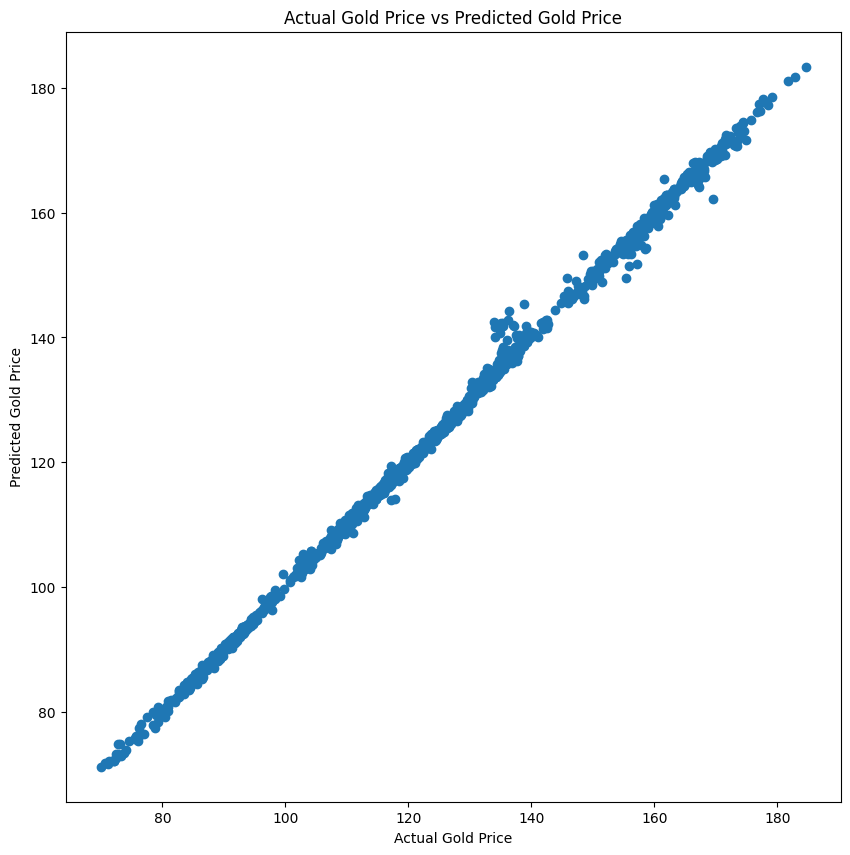

In [61]:
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual Gold Price vs Predicted Gold Price")

In [62]:
y_test_pred = model.predict(X_test)
mse_score = metrics.r2_score(y_test, y_test_pred)
print(f"Error square: {mse_score}")

Error square: 0.9888514347711073


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


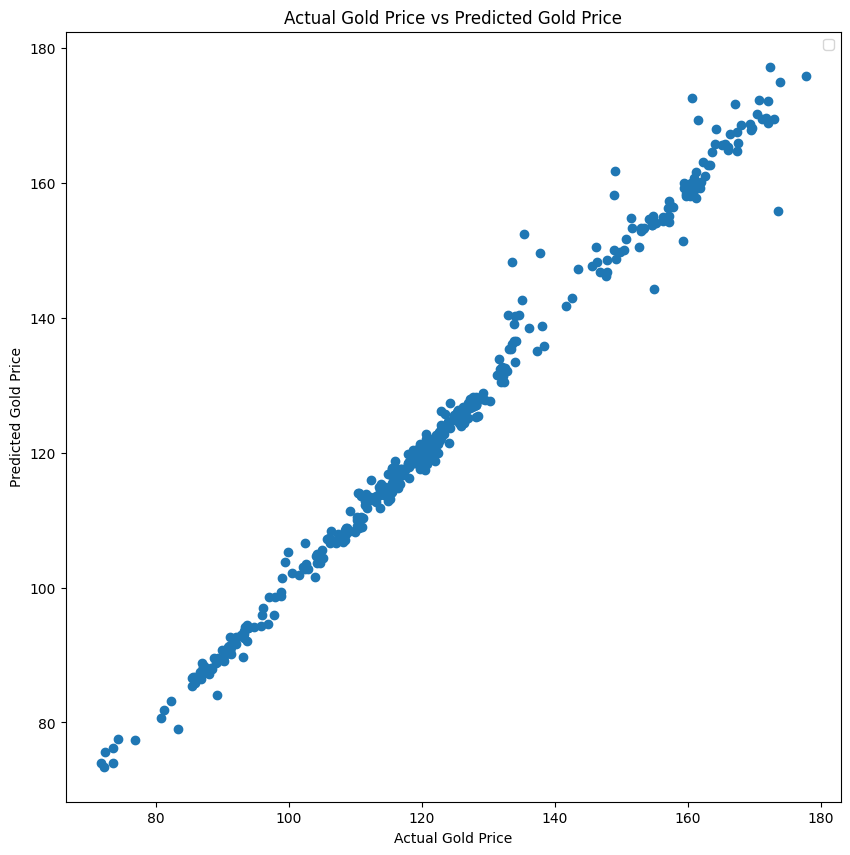

In [64]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_test_pred)
# plt.plot(y_test, color="blue", label="Actual value")
# plt.plot(y_test_pred, color="green", label="Predicted value")


plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.legend()
plt.title("Actual Gold Price vs Predicted Gold Price")
plt.show()

## Predictive system

In [48]:
raw_input = (1355.810059,73.080002,16.674999,1.483107) #92.059998

input_data = np.asarray(raw_input)
input_data = input_data.reshape(1, -1)

prediction = model.predict(input_data)
print(prediction[0])

91.46909871999996


/Users/amitthapa/workspace/learning/ml/ml-learning/krish_naik/.venv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
